# Supervised Learning Project

# Project Description:
Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.
We need to predict whether a customer will leave the bank soon. You have the data on clients’ past behavior and termination of contracts with the bank.
Build a model with the maximum possible F1 score. To pass the project, you need an F1 score of at least 0.59. Check the F1 for the test set.
Additionally, measure the AUC-ROC metric and compare it with the F1.

# Project Stucture:
 1. Download and prepare the data. Explain the procedure.
 2. Examine the balance of classes. Train the model without taking into account the imbalance. Briefly describe your findings.
 3. Improve the quality of the model. Make sure you use at least two approaches to fixing class imbalance. Use the training set to pick the best parameters. Train different models on training and validation sets. Find the best one. Briefly describe your findings.
 4. Perform the final testing.

# Data description:
 **Features**:
  - RowNumber — data string index
  - CustomerId — unique customer identifier
  - Surname — surname
  - CreditScore — credit score
  - Geography — country of residence
  - Gender — gender
  - Age — age
  - Tenure — period of maturation for a customer’s fixed deposit (years)
  - Balance — account balance
  - NumOfProducts — number of banking products used by the customer
  - HasCrCard — customer has a credit card
  - IsActiveMember — customer’s activeness
  - EstimatedSalary — estimated salary
  
 **Target**:
  - Exited — сustomer has left

In [76]:
#importing all needed libraries
from IPython.core.display import display, HTML

import matplotlib.pyplot as plt
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "seaborn"

import re
import statistics

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_colwidth', -1)

## Download and prepare the data.

In [77]:
try:
    data = pd.read_csv('/Users/yoheved/Desktop/Study/Churn.csv')
except:
    data = pd.read_csv('/datasets/Churn.csv')
data.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5772,5773,15663168,MacDonald,665,France,Male,35,8.0,110934.54,1,1,0,169287.99,0
5389,5390,15682728,Mathews,774,France,Female,32,4.0,0.00,2,0,0,114899.13,0
5415,5416,15747014,Pisani,850,France,Female,28,1.0,105245.34,1,0,1,74780.13,0
4917,4918,15681991,Walsh,542,France,Male,32,7.0,107871.72,1,1,0,125302.64,0
8032,8033,15755642,Bulgakov,667,France,Male,34,5.0,0.00,2,1,1,102908.63,0
2654,2655,15759874,Chamberlain,532,France,Male,44,NaN,148595.55,1,1,0,74838.64,1
2221,2222,15736069,Hsing,767,Germany,Female,35,6.0,132253.22,1,1,0,115566.57,1
8718,8719,15627298,Vinogradova,589,France,Male,37,7.0,85146.48,2,1,0,86490.09,1
4695,4696,15786739,Clements,669,France,Male,37,1.0,125529.55,1,1,1,162260.93,0
2445,2446,15654409,Unwin,665,France,Female,34,5.0,67816.72,1,1,1,29641.58,0


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**After first look on the dataset we can see that we have total 14 columns and 10000 rows. 3 columns are the float64 type, 3 columns are the object type and rest columns are the int64 type. Also we can see that Tenure columns has a missing values. Let's look futher what can be done to prepare data for testing**

In [79]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**We can see that features doesn't have any anomaly values like for example min age - 0. The features of CreditScore, Age, Tenure, Balance and EstimatedSalary have a fairly large spread, as evidenced by both relatively high standard deviation rates and a large difference between minimum and maximum values.**

### Data preprocessing

In [80]:
data.columns = data.columns.str.replace(r"([A-Z])", r" \1").str.lower().str.replace(' ', '_').str[1:]
data.head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


**I changed all column names to the low register and separated words in the names of columns for convenience. Now let's take a look on the missing values in the tenure column**

In [81]:
print('Amount of missing values: ', data['tenure'].isnull().sum())

Amount of missing values:  909


**Let's look at the distribution of the tenure feature.**



In [82]:
tenure = data['tenure'].value_counts().to_frame()
tenure.reset_index(inplace=True)
tenure.columns = ['tenure_cnt', 'count']
tenure

,tenure_cnt,count
0,1.0,952
1,2.0,950
2,8.0,933
3,3.0,928
4,5.0,927
5,7.0,925
6,4.0,885
7,9.0,882
8,6.0,881
9,10.0,446


In [83]:
fig = go.Figure([go.Bar(x = tenure['tenure_cnt'], y=tenure['count'])])
fig.update_layout(height = 450, showlegend = False, title_text = "Distribution of the Tenure feature")
fig.show()

**We can see that the smallest part of customers doesn't have deposit or has it for the period of 10 years. Rest customers have plus minus equal distribution of the Tenure feature. So to work with missing values we can assume that customers don't have any deposit in the bank, so we can replace missing values with 0, or we can replace missing values with mean or median. Let's check it out**

In [84]:
print('Mean:', data['tenure'].mean())
print('Median:', data['tenure'].median())

Mean: 4.997690023099769
Median: 5.0


**The mean and median are almost equal and pretty high. It could impact on our further calculations. So it is better to assume that customers don't have deposit in the bank and that's why didn't fill this graph. So we will replace missing values with 0**

In [85]:
data['tenure'] = data['tenure'].fillna(0)
data['tenure'].value_counts()

0.0     1291
1.0     952 
2.0     950 
8.0     933 
3.0     928 
5.0     927 
7.0     925 
4.0     885 
9.0     882 
6.0     881 
10.0    446 
Name: tenure, dtype: int64

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**Let's change the tenure data type to int**

In [87]:
data['tenure'] = data['tenure'].astype('int')

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  int64  
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Let's remove columns row_number, customer_id and surname since we don't need them for any calculations or testing**

In [89]:
df = data.drop(['row_number', 'customer_id', 'surname'], axis=1)
df.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [90]:
print('Duplicates amount:', df.duplicated().sum())

Duplicates amount: 0


### Data transormation

In [91]:
df = pd.get_dummies(df, drop_first=True)
df. sample(10)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
9658,713,39,10,0.00,2,1,1,126263.97,0,0,0,0
4599,641,38,3,0.00,2,1,0,116466.19,0,0,0,0
2305,582,29,0,0.00,1,1,0,142516.35,0,0,0,1
793,743,34,1,131736.88,1,1,1,108543.21,0,1,0,0
6688,550,22,6,154377.30,1,1,1,51721.52,0,0,0,1
7027,464,37,4,155994.15,1,0,0,143665.44,0,1,0,1
7637,766,32,6,185714.28,1,1,1,102502.50,0,0,0,1
5061,633,42,1,0.00,2,1,0,56865.62,0,0,0,0
4232,745,47,5,0.00,2,0,0,145789.71,0,0,0,1
394,594,24,0,97378.54,1,1,1,71405.17,0,0,1,0


In [92]:
df = df.rename(columns = {'geography_Germany': 'geography_germany', 
                                  'geography_Spain': 'geography_spain', 
                                  'gender_Male': 'gender_male'}, inplace = False)
df.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_germany,geography_spain,gender_male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


**Let's check correlation between columns**

In [93]:
df.corr()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_germany,geography_spain,gender_male
credit_score,1.000000,-0.003965,0.003087,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
age,-0.003965,1.000000,-0.007368,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
tenure,0.003087,-0.007368,1.000000,-0.005821,0.010106,0.021387,-0.025856,0.011225,-0.013319,0.001676,-0.000745,0.014889
balance,0.006268,0.028308,-0.005821,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
num_of_products,0.012238,-0.030680,0.010106,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
has_cr_card,-0.005458,-0.011721,0.021387,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
is_active_member,0.025651,0.085472,-0.025856,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
estimated_salary,-0.001384,-0.007201,0.011225,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
exited,-0.027094,0.285323,-0.013319,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512
geography_germany,0.005538,0.046897,0.001676,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.024628


**We don't have any columns with high correlation**

### Splitting the data

**Since we don't have test set we will split the data to the three sets: training, validation and test sets on the proportion 60:20:20.**

In [94]:
target = df['exited']
features = df.drop('exited', axis=1)

In [95]:
features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                              target, 
                                                                              train_size=0.60, 
                                                                              test_size=0.40, 
                                                                              random_state=123, 
                                                                              stratify=target)

In [96]:
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, 
                                                                            target_valid, 
                                                                            train_size=0.50, 
                                                                            test_size=0.50, 
                                                                            random_state=123, 
                                                                            stratify=target_valid)

In [97]:
samples = {'Training set' : features_train, 
          'Validation set': features_valid, 
          'Test set': features_test}

for key, value in samples.items():
    print(key + ':', value.shape)

Training set: (6000, 11)
Validation set: (2000, 11)
Test set: (2000, 11)


### Feature scaling

**Let's scale the features so that the models during training are not tied to features with large values and scatter**



In [98]:
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

In [99]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [100]:
features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
6255,-1.081763,1.561078,-1.463231,0.567612,2.552230,1,0,-1.444757,1,0,1
7141,1.083241,-0.091611,-1.140673,0.097622,-0.926107,0,1,-1.559126,1,0,0
3824,0.167278,0.491691,-1.463231,0.751314,-0.926107,0,0,-1.476028,0,0,1
1901,1.509997,2.727681,0.149559,-1.219982,0.813061,0,1,-0.786010,0,1,1
2886,-2.101813,-0.188828,0.472117,-1.219982,0.813061,1,0,-0.312019,0,0,0


**Now we have all done for the further steps**

### Conclusion

After first look on the dataset we can see that we have total 14 columns and 10000 rows. 3 columns are the float64 type, 3 columns are the object type and rest columns are the int64 type. Also we can see that Tenure columns has a missing values. Let's look futher what can be done to prepare data for testing. We can see that features doesn't have any anomaly values like for example min age - 0. The features of CreditScore, Age, Tenure, Balance and EstimatedSalary have a fairly large spread, as evidenced by both relatively high standard deviation rates and a large difference between minimum and maximum values. I changed all column names to the low register and separated words in the names of columns for convenience. Now let's take a look on the missing values in the tenure column. The mean and median are almost equal and pretty high. It could impact on our further calculations. So it is better to assume that customers don't have deposit in the bank and that's why didn't fill this graph. So we will replace missing values with 0. We don't have any columns with high correlation. I've splitted the data to the three sets and made scaling for data, so now it is ready.

## Examine the balance of classes. Train the model without taking into account the imbalance. Briefly describe your findings.

**Checking the balance of classes**

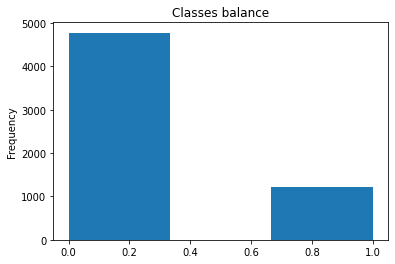

In [101]:
target_train.plot(kind='hist', bins=3, title='Classes balance')
plt.show()

In [102]:
target_train.value_counts()

0    4778
1    1222
Name: exited, dtype: int64

**We see imbalanced classes what is not good. But let's try to train the models with what we have first**

In [103]:
results_imb_lr = []

penalty_l1 = LogisticRegression(random_state=123, class_weight='balanced', solver='liblinear', penalty='l1') 
penalty_l2 = LogisticRegression(random_state=123, class_weight='balanced', solver='lbfgs', penalty='l2') 

models_lr = [penalty_l1, penalty_l2]

for model in models_lr:
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)

    accuracy = accuracy_score(target_valid, predictions_valid)
    f1 = f1_score(target_valid, predictions_valid)
    roc_auc = roc_auc_score(target_valid, probabilities_valid[:,1])
    
    results_imb_lr.append({'Model': model.__class__.__name__ + '_' + model.penalty , 
                       'Hyperparameters': {'random_state': 123, 
                                          'class_weight': model.class_weight, 
                                          'solver': model.solver, 
                                          'penalty': model.penalty},
                       'Accuracy': accuracy, 
                       'F1 score': f1, 
                       'ROC AUC score': roc_auc})
    
pd.DataFrame(results_imb_lr).style.highlight_max(color = 'lightgreen', axis = 0)

,Model,Hyperparameters,Accuracy,F1 score,ROC AUC score
0,LogisticRegression_l1,"{'random_state': 123, 'class_weight': 'balanced', 'solver': 'liblinear', 'penalty': 'l1'}",0.691500,0.460192,0.734554
1,LogisticRegression_l2,"{'random_state': 123, 'class_weight': 'balanced', 'solver': 'lbfgs', 'penalty': 'l2'}",0.691500,0.460192,0.734507


In [104]:
results_imb_dtc = []

for depth in range(1,11):
    model = DecisionTreeClassifier(random_state=123, max_depth=depth)
    
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
 
    accuracy = accuracy_score(target_valid, predictions_valid)        
    f1 = f1_score(target_valid, predictions_valid)
    roc_auc = roc_auc_score(target_valid, probabilities_valid[:,1])        

    results_imb_dtc.append({'Model': 'DecisionTreeClassifier', 
                        'Hyperparameters': {'random_state': 123, 'max_depth':depth},
                        'Accuracy': accuracy, 
                        'F1 score': f1, 
                        'ROC AUC score': roc_auc})

pd.DataFrame(results_imb_dtc).style.highlight_max(color = 'lightgreen', axis = 0)

,Model,Hyperparameters,Accuracy,F1 score,ROC AUC score
0,DecisionTreeClassifier,"{'random_state': 123, 'max_depth': 1}",0.796000,0.000000,0.670245
1,DecisionTreeClassifier,"{'random_state': 123, 'max_depth': 2}",0.824500,0.499287,0.731397
2,DecisionTreeClassifier,"{'random_state': 123, 'max_depth': 3}",0.833000,0.352713,0.786404
3,DecisionTreeClassifier,"{'random_state': 123, 'max_depth': 4}",0.845000,0.504792,0.814274
4,DecisionTreeClassifier,"{'random_state': 123, 'max_depth': 5}",0.851500,0.562592,0.826084
5,DecisionTreeClassifier,"{'random_state': 123, 'max_depth': 6}",0.852500,0.531002,0.824193
6,DecisionTreeClassifier,"{'random_state': 123, 'max_depth': 7}",0.851000,0.565598,0.821399
7,DecisionTreeClassifier,"{'random_state': 123, 'max_depth': 8}",0.828500,0.506475,0.789364
8,DecisionTreeClassifier,"{'random_state': 123, 'max_depth': 9}",0.838500,0.532562,0.762288
9,DecisionTreeClassifier,"{'random_state': 123, 'max_depth': 10}",0.825000,0.524457,0.740916


In [105]:
%%time
results_imb_rfc = []

for depth in range(1,15):
    
    for estimator in range(10, 101, 10):
        
        model = RandomForestClassifier(random_state=123, 
                                       n_estimators=estimator, 
                                       max_depth=depth) 
        
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        probabilities_valid = model.predict_proba(features_valid)
        
        accuracy = accuracy_score(target_valid, predictions_valid)        
        f1 = f1_score(target_valid, predictions_valid)
        roc_auc = roc_auc_score(target_valid, probabilities_valid[:,1])       
    
        results_imb_rfc.append({'Model': 'RandomForestClassifier', 
                               'Hyperparameters': {'random_state': 123, 
                                                   'n_estimators': estimator, 
                                                   'max_depth':depth}, 
                               'Accuracy': accuracy,
                               'F1 score': f1, 
                               'ROC AUC score': roc_auc})

CPU times: user 42.8 s, sys: 146 ms, total: 43 s
Wall time: 43 s


In [106]:
pd.DataFrame(results_imb_rfc).style.highlight_max(color = 'lightgreen', axis = 0)


,Model,Hyperparameters,Accuracy,F1 score,ROC AUC score
0,RandomForestClassifier,"{'random_state': 123, 'n_estimators': 10, 'max_depth': 1}",0.796000,0.000000,0.760711
1,RandomForestClassifier,"{'random_state': 123, 'n_estimators': 20, 'max_depth': 1}",0.796000,0.000000,0.764102
2,RandomForestClassifier,"{'random_state': 123, 'n_estimators': 30, 'max_depth': 1}",0.796000,0.000000,0.770405
3,RandomForestClassifier,"{'random_state': 123, 'n_estimators': 40, 'max_depth': 1}",0.796000,0.000000,0.777828
4,RandomForestClassifier,"{'random_state': 123, 'n_estimators': 50, 'max_depth': 1}",0.796000,0.000000,0.776742
5,RandomForestClassifier,"{'random_state': 123, 'n_estimators': 60, 'max_depth': 1}",0.796000,0.000000,0.779916
6,RandomForestClassifier,"{'random_state': 123, 'n_estimators': 70, 'max_depth': 1}",0.796000,0.000000,0.780427
7,RandomForestClassifier,"{'random_state': 123, 'n_estimators': 80, 'max_depth': 1}",0.796000,0.000000,0.779963
8,RandomForestClassifier,"{'random_state': 123, 'n_estimators': 90, 'max_depth': 1}",0.796000,0.000000,0.780529
9,RandomForestClassifier,"{'random_state': 123, 'n_estimators': 100, 'max_depth': 1}",0.796000,0.000000,0.782885


**We can see that the best result for imbalanced classes showed the Random Forest model**

## Improve the quality of the model. Make sure you use at least two approaches to fixing class imbalance. Use the training set to pick the best parameters. Train different models on training and validation sets. Find the best one. Briefly describe your findings.

**There are 3 methods to fix class imbalance:**
  1. Class weight adjustment
  2. Upsampling
  3. Downsampling. 
  
**Let's see which one will give us the best result**

### Class weight adjustment

In [107]:
models_balanced = [LogisticRegression(random_state=123, class_weight='balanced'), 
                   DecisionTreeClassifier(random_state=123, class_weight='balanced'), 
                   RandomForestClassifier(random_state=123, class_weight='balanced')]

results_balanced = []

for model in models_balanced:
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    
    accuracy = accuracy_score(target_valid, predictions_valid)
    f1 = f1_score(target_valid, predictions_valid)
    roc_auc = roc_auc_score(target_valid, probabilities_valid[:,1])
    
    results_balanced.append({'Model': model.__class__.__name__,
                             'accuracy_balanced': accuracy,
                             'f1_balanced': f1, 
                             'ROC AUC score_balanced': roc_auc})

In [108]:
balanced = pd.DataFrame(results_balanced)
balanced

,Model,accuracy_balanced,f1_balanced,ROC AUC score_balanced
0,LogisticRegression,0.6915,0.460192,0.734507
1,DecisionTreeClassifier,0.7975,0.491844,0.679581
2,RandomForestClassifier,0.8550,0.544025,0.840879


**The Random Forest model again showed the best result.**

### Upsampling

In [109]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=123)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [110]:
print(features_upsampled.shape)
print(target_upsampled.shape)

(9666, 11)
(9666,)


In [111]:
values = target_upsampled.value_counts()
values = values.to_frame().reset_index()
values.columns = ['Boolean', 'Count']
pd.DataFrame(values)
values

,Boolean,Count
0,1,4888
1,0,4778


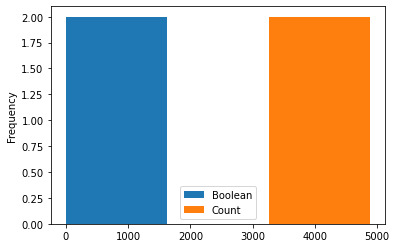

In [112]:
values.plot(kind='hist', bins=3)
plt.show()

**Now samples are balanced**

In [113]:
models_upsampled = [LogisticRegression(random_state=123), 
                   DecisionTreeClassifier(random_state=123), 
                   RandomForestClassifier(random_state=123)]
results_upsampling = []

for model in models_upsampled:
    model.fit(features_upsampled, target_upsampled)
    predictions_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    
    accuracy = accuracy_score(target_valid, predictions_valid)
    f1 = f1_score(target_valid, predictions_valid)
    roc_auc = roc_auc_score(target_valid, probabilities_valid[:,1])
    
    results_upsampling.append({'Model': model.__class__.__name__, 
                               'accuracy_up': accuracy,
                               'f1_up': f1, 
                               'ROC AUC score_up': roc_auc})

In [114]:
final_results = balanced.merge(pd.DataFrame(results_upsampling), on='Model')
final_results = final_results.reindex(sorted(final_results.columns), axis=1)
final_results

,Model,ROC AUC score_balanced,ROC AUC score_up,accuracy_balanced,accuracy_up,f1_balanced,f1_up
0,LogisticRegression,0.734507,0.734518,0.6915,0.6865,0.460192,0.458081
1,DecisionTreeClassifier,0.679581,0.682001,0.7975,0.7970,0.491844,0.495025
2,RandomForestClassifier,0.840879,0.842090,0.8550,0.8515,0.544025,0.597015


**Again Random Forest model showed better results.**

### Downsampling

In [115]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=123)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=123)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=123)
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [116]:
print(features_downsampled.shape)
print(target_downsampled.shape)

(2416, 11)
(2416,)


In [117]:
values = target_downsampled.value_counts()
values = values.to_frame().reset_index()
values.columns = ['Boolean', 'Count']
pd.DataFrame(values)
values

,Boolean,Count
0,1,1222
1,0,1194


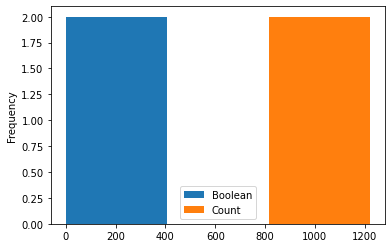

In [118]:
values.plot(kind='hist', bins=3)
plt.show()

**Ok, classes are well balanced. Let's see what models will show us**

In [119]:
models_downsampled = [LogisticRegression(random_state=123), 
                   DecisionTreeClassifier(random_state=123), 
                   RandomForestClassifier(random_state=123)]
results_downsampling = []

for model in models_downsampled:
    model.fit(features_downsampled, target_downsampled)
    predictions_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    
    accuracy = accuracy_score(target_valid, predictions_valid)
    f1 = f1_score(target_valid, predictions_valid)
    roc_auc = roc_auc_score(target_valid, probabilities_valid[:,1])
    
    results_downsampling.append({'Model': model.__class__.__name__, 
                                 'accuracy_down': accuracy, 
                                 'f1_down': f1, 
                                 'ROC AUC score_down': roc_auc})

In [120]:
final_results = final_results.merge(pd.DataFrame(results_downsampling), on='Model')
final_results = final_results.reindex(sorted(final_results.columns), axis=1)
final_results.style.highlight_max(color = 'lightgreen', axis = 0)

,Model,ROC AUC score_balanced,ROC AUC score_down,ROC AUC score_up,accuracy_balanced,accuracy_down,accuracy_up,f1_balanced,f1_down,f1_up
0,LogisticRegression,0.734507,0.733288,0.734518,0.691500,0.682000,0.686500,0.460192,0.456410,0.458081
1,DecisionTreeClassifier,0.679581,0.692069,0.682001,0.797500,0.695500,0.797000,0.491844,0.479042,0.495025
2,RandomForestClassifier,0.840879,0.840597,0.842090,0.855000,0.758000,0.851500,0.544025,0.555147,0.597015


**The Random Forest model gave us the best result but interesting on which sample each of the models showed the best result of the metric f1_score.**



In [121]:
final_results.style.highlight_max(subset = final_results.columns[-4:], color = 'lightgreen', axis = 1)


,Model,ROC AUC score_balanced,ROC AUC score_down,ROC AUC score_up,accuracy_balanced,accuracy_down,accuracy_up,f1_balanced,f1_down,f1_up
0,LogisticRegression,0.734507,0.733288,0.734518,0.691500,0.682000,0.686500,0.460192,0.456410,0.458081
1,DecisionTreeClassifier,0.679581,0.692069,0.682001,0.797500,0.695500,0.797000,0.491844,0.479042,0.495025
2,RandomForestClassifier,0.840879,0.840597,0.842090,0.855000,0.758000,0.851500,0.544025,0.555147,0.597015


**THe logisitc regression model works better with class weight method while desicion tree and random forest work better with upsampling method. So let's train each model with the method showed the best result for it**

### Train different models on training and validation sets. Find the best one

**Logistic Regression**

In [122]:
results_lr = []

penalty_l1 = LogisticRegression(random_state=123, class_weight='balanced', solver='liblinear', penalty='l1') 
penalty_l2 = LogisticRegression(random_state=123, class_weight='balanced', solver='lbfgs', penalty='l2') 

models_lr = [penalty_l1, penalty_l2]

for model in models_lr:
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)

    accuracy = accuracy_score(target_valid, predictions_valid)
    f1 = f1_score(target_valid, predictions_valid)
    roc_auc = roc_auc_score(target_valid, probabilities_valid[:,1])
    
    results_lr.append({'Model': model.__class__.__name__ + '_' + model.penalty , 
                       'Hyperparameters': {'random_state': 123, 
                                          'class_weight': model.class_weight, 
                                          'solver': model.solver, 
                                          'penalty': model.penalty},
                       'Accuracy': accuracy, 
                       'F1 score': f1, 
                       'ROC AUC score': roc_auc})
    
pd.DataFrame(results_lr)

,Model,Hyperparameters,Accuracy,F1 score,ROC AUC score
0,LogisticRegression_l1,"{'random_state': 123, 'class_weight': 'balanced', 'solver': 'liblinear', 'penalty': 'l1'}",0.758,0.555147,0.734554
1,LogisticRegression_l2,"{'random_state': 123, 'class_weight': 'balanced', 'solver': 'lbfgs', 'penalty': 'l2'}",0.758,0.555147,0.734507


The results almost the same, but for hyperparameter 'liblinear' ROC AUC score is little bit higher. So I will add it to the final table with the best results.

In [123]:
best_results = []
best_results.append(pd.DataFrame(results_lr).loc[0])

**Decision Tree model**

In [124]:
results_dtc = []

for depth in range(1,11):
    model = DecisionTreeClassifier(random_state=123, max_depth=depth)
    
    model.fit(features_upsampled, target_upsampled)
    predictions_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
 
    accuracy = accuracy_score(target_valid, predictions_valid)        
    f1 = f1_score(target_valid, predictions_valid)
    roc_auc = roc_auc_score(target_valid, probabilities_valid[:,1])        

    results_dtc.append({'Model': 'DecisionTreeClassifier', 
                        'Hyperparameters': {'random_state': 123, 'max_depth':depth},
                        'Accuracy': accuracy, 
                        'F1 score': f1, 
                        'ROC AUC score': roc_auc})

pd.DataFrame(results_dtc).style.highlight_max(color = 'lightgreen', axis = 0)

,Model,Hyperparameters,Accuracy,F1 score,ROC AUC score
0,DecisionTreeClassifier,"{'random_state': 123, 'max_depth': 1}",0.710000,0.462963,0.673835
1,DecisionTreeClassifier,"{'random_state': 123, 'max_depth': 2}",0.720000,0.496403,0.735933
2,DecisionTreeClassifier,"{'random_state': 123, 'max_depth': 3}",0.720000,0.496403,0.785846
3,DecisionTreeClassifier,"{'random_state': 123, 'max_depth': 4}",0.748500,0.544796,0.811886
4,DecisionTreeClassifier,"{'random_state': 123, 'max_depth': 5}",0.736500,0.550725,0.833776
5,DecisionTreeClassifier,"{'random_state': 123, 'max_depth': 6}",0.760500,0.559338,0.826147
6,DecisionTreeClassifier,"{'random_state': 123, 'max_depth': 7}",0.762500,0.548908,0.813561
7,DecisionTreeClassifier,"{'random_state': 123, 'max_depth': 8}",0.761500,0.540905,0.780740
8,DecisionTreeClassifier,"{'random_state': 123, 'max_depth': 9}",0.758000,0.528265,0.762914
9,DecisionTreeClassifier,"{'random_state': 123, 'max_depth': 10}",0.752000,0.510848,0.735242


The best result for F1 score Decision Tree model shows with hypermarameter 'max_depth - 6'. I will add it to the best results table

In [125]:
best_results.append(pd.DataFrame(results_dtc).loc[5])

**Random Forest model**

In [126]:
%%time
results_rfc_up = []

for depth in range(1,15):
    
    for estimator in range(10, 101, 10):
        
        model = RandomForestClassifier(random_state=123, 
                                       n_estimators=estimator, 
                                       max_depth=depth) 
        
        model.fit(features_upsampled, target_upsampled)
        predictions_valid = model.predict(features_valid)
        probabilities_valid = model.predict_proba(features_valid)
        
        accuracy = accuracy_score(target_valid, predictions_valid)        
        f1 = f1_score(target_valid, predictions_valid)
        roc_auc = roc_auc_score(target_valid, probabilities_valid[:,1])       
    
        results_rfc_up.append({'Model': 'RandomForestClassifier', 
                               'Hyperparameters': {'random_state': 123, 
                                                   'n_estimators': estimator, 
                                                   'max_depth':depth}, 
                               'Accuracy': accuracy,
                               'F1 score': f1, 
                               'ROC AUC score': roc_auc})

CPU times: user 56.8 s, sys: 213 ms, total: 57 s
Wall time: 57 s


The best results gives us the next combination of hyperparameters:

In [127]:
df_rfc_up = pd.DataFrame.from_dict(results_rfc_up)
df_rfc_up[df_rfc_up['F1 score']==df_rfc_up['F1 score'].max()]

,Model,Hyperparameters,Accuracy,F1 score,ROC AUC score
91,RandomForestClassifier,"{'random_state': 123, 'n_estimators': 20, 'max_depth': 10}",0.818,0.6,0.848249


The best results gives us the combimation of 'n_estimators: 20' and 'max_depth: 10'. Let's add it to the best results table.

In [128]:
best_results.append(pd.DataFrame(df_rfc_up).loc[91])

In [129]:
pd.DataFrame(best_results).reset_index().style.highlight_max(color = 'lightgreen', axis = 0)

,index,Model,Hyperparameters,Accuracy,F1 score,ROC AUC score
0,0,LogisticRegression_l1,"{'random_state': 123, 'class_weight': 'balanced', 'solver': 'liblinear', 'penalty': 'l1'}",0.758000,0.555147,0.734554
1,5,DecisionTreeClassifier,"{'random_state': 123, 'max_depth': 6}",0.760500,0.559338,0.826147
2,91,RandomForestClassifier,"{'random_state': 123, 'n_estimators': 20, 'max_depth': 10}",0.818000,0.600000,0.848249


### Conclusion

After checking all methods to makes balance in classes after testing the best results showed Random Forest model with hypermarameters 'n_estimators: 20' and 'max_depth: 10'. 

## Perform the final testing

In [130]:
model_final = RandomForestClassifier(random_state=123, n_estimators=20, max_depth=10)

model_final.fit(features_upsampled, target_upsampled)  
predictions_final = model_final.predict(features_test)
probabilities_final = model_final.predict_proba(features_test)

accuracy_final = accuracy_score(target_test, predictions_final)
f1_final = f1_score(target_test, predictions_final)
roc_auc_final = roc_auc_score(target_test, probabilities_final[:,1])

print('accuracy', accuracy_final)
print('f1 score', f1_final)
print('roc_auc', roc_auc_final)

accuracy 0.8225
f1 score 0.6203208556149733
roc_auc 0.858824155434325


**Let's check the work of model on the extension sample**

In [131]:
features_combined = pd.concat([features_train, features_valid])
target_combined = pd.concat([target_train, target_valid])

In [132]:
features_upsampled_combined, target_upsampled_combined = upsample(features_combined, target_combined, 4)

In [133]:
print(features_upsampled_combined.shape)
print(target_upsampled_combined.shape)

(12890, 11)
(12890,)


In [134]:
model_combined = RandomForestClassifier(random_state=123, n_estimators=20, max_depth=10)

model_combined.fit(features_upsampled_combined, target_upsampled_combined)  

predictions_combined = model_combined.predict(features_test)
probabilities_combined = model_combined.predict_proba(features_test)

accuracy_combined = accuracy_score(target_test, predictions_final)
f1_combined = f1_score(target_test, predictions_combined)
roc_auc_combined = roc_auc_score(target_test, probabilities_combined[:,1])

print('accuracy', accuracy_combined)
print('f1 score', f1_combined)
print('roc_auc', roc_auc_combined)

accuracy 0.8225
f1 score 0.6153846153846154
roc_auc 0.8630063036842699


In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_final[:,1])
trace_rf = go.Scatter(x = fpr,y = tpr,
                      name = "Random Forest: " + str(roc_auc_final), 
                      line = dict(width = 2))
trace_random = go.Scatter(x = [0.0, 1.0], y = [0.0, 1.0], 
                          name = 'Random Model',
                          line = dict(width = 2, dash = 'dot'))

data = [trace_rf, trace_random]
layout = go.Layout(dict(title = 'ROC-curve',
                        height = 550, width = 900,
                        xaxis = dict(title = "False Positive Rate"),
                        yaxis = dict(title = "True Positive Rate")))

fig = go.Figure(data, layout=layout)
fig.show()

In [136]:
strategies = ['stratified', 'most_frequent', 'uniform'] 
  
dummy_results = [] 
for strategy in strategies: 
    dc = DummyClassifier(strategy = strategy, random_state = 42)
    
    dc.fit(features_train, target_train) 
    result = dc.score(features_test, target_test) 
    dummy_results.append({strategy: result}) 

pd.DataFrame(dummy_results).style.highlight_max(color = 'lightgreen', axis = 1)

,stratified,most_frequent,uniform
0,0.664000,nan,nan
1,nan,0.796500,nan
2,nan,nan,0.492500


**We can see that the random forest model with hyperparameters n_estimators = 20 and max_depth = 10 works better than the random prediction strategies of the DummyClassifier() classifier.**

# Conclusion

Checking the model on the test sample and on the extended sample shows that the model works quite well - the metric indicator f1_score was achieved higher than was stated in the requirements (the minimum requirement for this metric was 0.59, our model gives a result of 0.62).

The metric roc_auc_score = 0.858, which is a good result.

The model works well, the goal of the project is achieved.